### **PREDICTIVE MODELING OF DIARRHEAL DISEASE BASED ON DRINKING WATER QUALITY PARAMETERS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import files
#files.upload()

In [3]:
water_data = pd.read_csv('water_quality_prediction.csv')
water_data

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0
1048573,1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,...,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,3.0,0


In [4]:
type(water_data)

pandas.core.frame.DataFrame

In [5]:
water_data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [6]:
water_data.tail()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0
1048573,1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,...,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,3.0,0
1048574,1048574,8.330849,2.996820e-04,2.360790,187.440277,5.650000e-243,1.157979,Colorless,0.272353,0.037678,...,3.589297,3.050000e-08,232.443406,NaN,10.493711,59.265142,April,19.0,21.0,0


In [7]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

In [8]:
water_data.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.048575e+06,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,...,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.031026e+06,1.028214e+06,1.048575e+06
mean,5.242870e+05,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,...,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,1.573196e+01,1.149062e+01,2.295821e-01
std,3.026977e+05,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,...,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,8.798726e+00,6.925925e+00,4.205643e-01
min,0.000000e+00,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,...,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,...,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,8.000000e+00,5.000000e+00,0.000000e+00
50%,5.242870e+05,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,...,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,1.600000e+01,1.100000e+01,0.000000e+00
75%,7.864305e+05,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,...,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,2.300000e+01,1.700000e+01,0.000000e+00
max,1.048574e+06,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,...,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [9]:
water_data.isnull().sum()

,0
Index,0
pH,20231
Iron,6991
Nitrate,18695
Chloride,30834
Lead,4684
Zinc,27675
Color,981
Turbidity,8694
Fluoride,33218


In [10]:
water_data = water_data.dropna()

In [11]:
water_data.isnull().sum()

,0
Index,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,0
Turbidity,0
Fluoride,0


## **Analyzing the Water Quality Parameters**

**Chlorine**

<Axes: xlabel='Chlorine', ylabel='Density'>

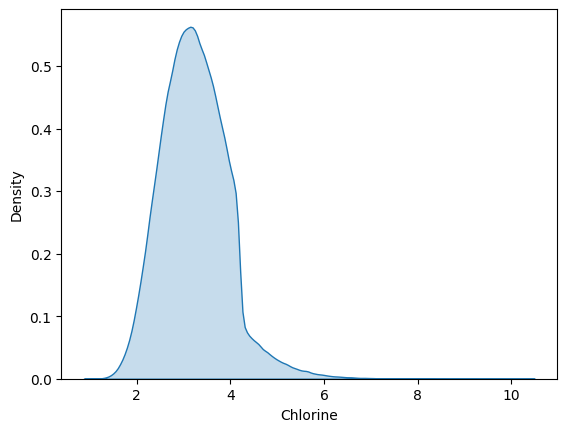

In [12]:
sns.kdeplot(water_data["Chlorine"], shade = True)

In [13]:
# Function to classify chlorine status
def chlorine_status(value):
    if value < 0.2:
        return 'Low'
    elif 0.2 <= value <= 1.0:
        return 'Safe'
    elif 1.0 < value <= 5.0:
        return 'High'
    else:
        return 'Unsafe'

In [14]:
# Add status column
water_data['Chlorine Status'] = water_data['Chlorine'].apply(chlorine_status)

In [15]:
# Count and display chlorine status
print("Chlorine Status Counts:")
print(water_data['Chlorine Status'].value_counts())

Chlorine Status Counts:
Chlorine Status
High      687966
Unsafe     13090
Name: count, dtype: int64


<Axes: xlabel='Chlorine Status', ylabel='count'>

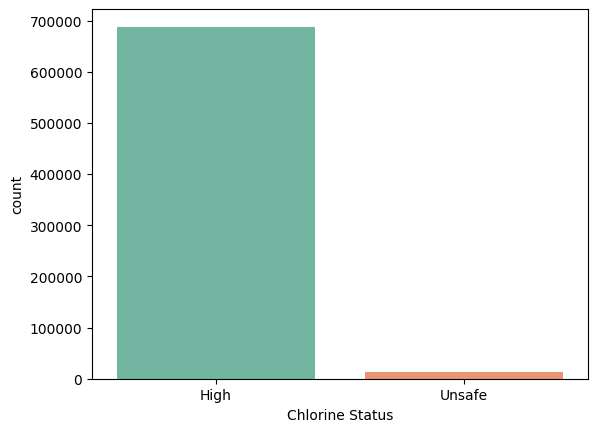

In [16]:
sns.countplot(x = 'Chlorine Status', data = water_data, palette = 'Set2')

In [17]:
print("Number of unsafe chlorine samples:", (water_data['Chlorine'] >= 5).sum())

Number of unsafe chlorine samples: 13090


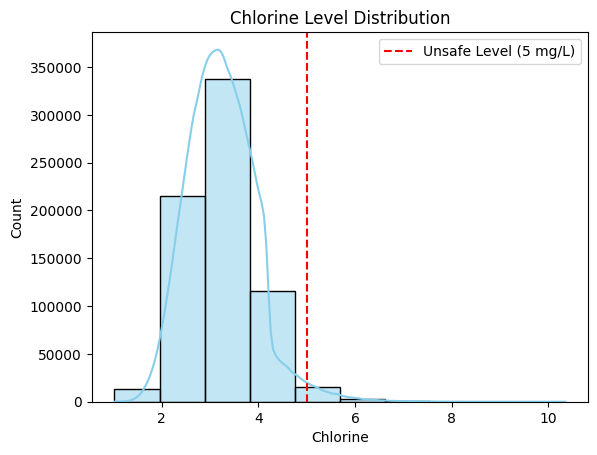

In [18]:
sns.histplot(water_data['Chlorine'], bins=10, kde=True, color='skyblue')
plt.axvline(5, color='red', linestyle='--', label='Unsafe Level (5 mg/L)')
plt.title("Chlorine Level Distribution")
plt.legend()
plt.show()

**pH**

<Axes: xlabel='pH', ylabel='Density'>

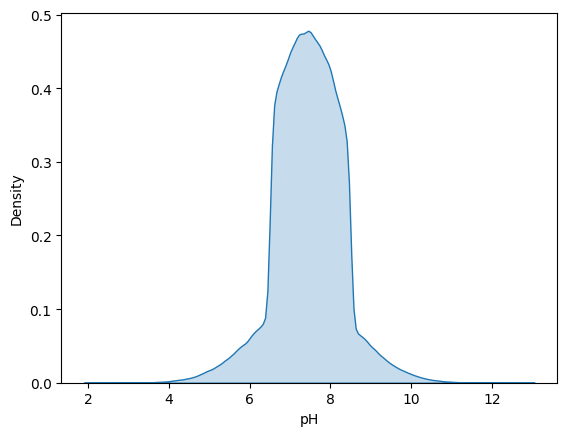

In [19]:
sns.kdeplot(water_data["pH"], shade = True)

In [20]:
# Function to classify chlorine status
def pH_status(value):
    if 0.0 < value < 0.69:
        return 'Acidic'
    elif 7.1 <= value <= 14.0:
        return 'Basic'
    else:
        return 'Pure Water'

In [21]:
# Add status column
water_data['pH Status'] = water_data['pH'].apply(pH_status)

In [22]:
# Count and display pH status
print("pH Counts:")
print(water_data['pH Status'].value_counts())

pH Counts:
pH Status
Basic         467494
Pure Water    233562
Name: count, dtype: int64


<Axes: xlabel='pH Status', ylabel='count'>

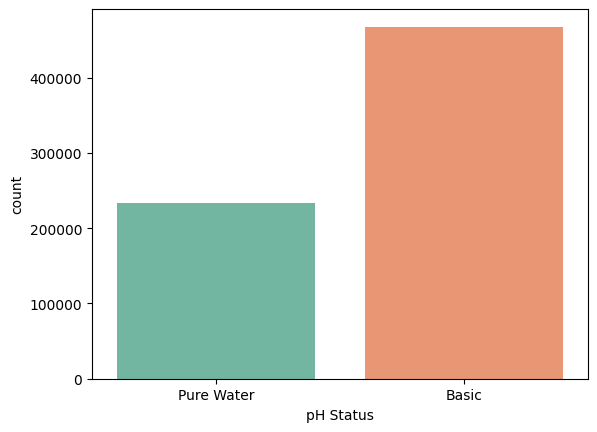

In [23]:
sns.countplot(x = 'pH Status', data = water_data, palette = 'Set2')

In [24]:
print("Number of pure water samples:", (water_data['pH'] == 7).sum())

Number of pure water samples: 0


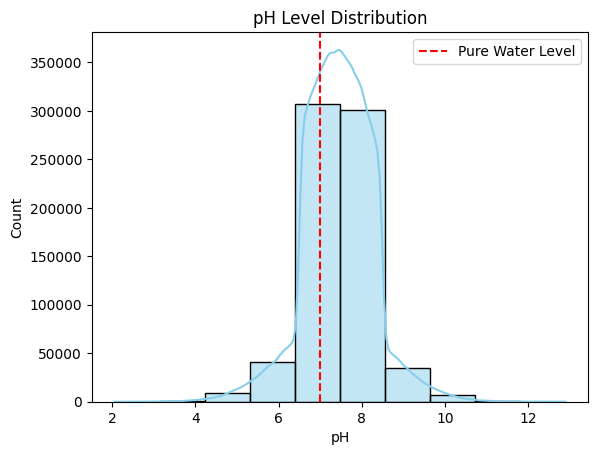

In [25]:
sns.histplot(water_data['pH'], bins=10, kde=True, color='skyblue')
plt.axvline(7, color='red', linestyle='--', label='Pure Water Level')
plt.title("pH Level Distribution")
plt.legend()
plt.show()

**Nitrate**

<Axes: xlabel='Nitrate', ylabel='Density'>

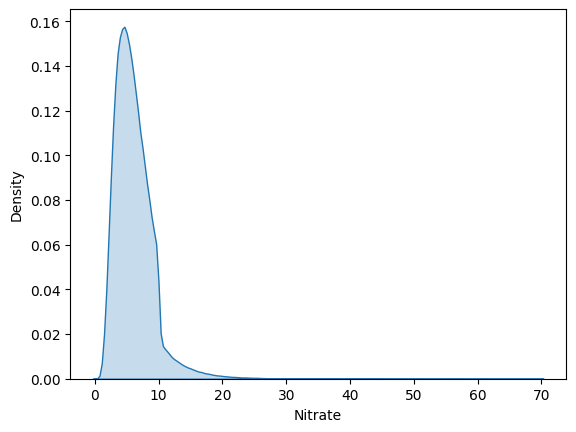

In [26]:
sns.kdeplot(water_data["Nitrate"], shade = True)

In [27]:
# Function to classify nitrate safety
def nitrate_status(value):
    if value <= 50:
        return 'Safe'
    else:
        return 'Unsafe'

In [28]:
# Add status column
water_data['Nitrate Status'] = water_data['Nitrate'].apply(nitrate_status)

In [29]:
# Print the nitrate status for each sample
#for index, row in water_data.iterrows():
#    print(f"Sample {row['Index']}: Nitrate = {row['Nitrate']} mg/L --> Status: {row['Nitrate Status']}")

In [30]:
water_data[['Index', 'Nitrate', 'Nitrate Status']].head()

,Index,Nitrate,Nitrate Status
1,1,3.734167,Safe
2,2,3.816994,Safe
4,4,9.925788,Safe
7,7,9.261676,Safe
9,9,3.620641,Safe


In [31]:
# Count of status types
print("\n📊 Nitrate Status Counts:")
print(water_data['Nitrate Status'].value_counts())


📊 Nitrate Status Counts:
Nitrate Status
Safe      701038
Unsafe        18
Name: count, dtype: int64


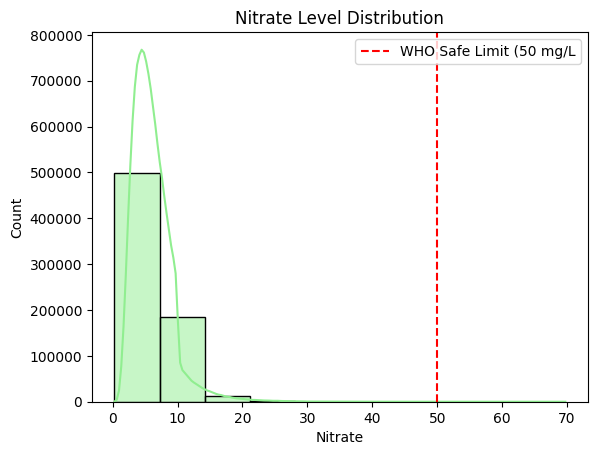

In [32]:
sns.histplot(water_data['Nitrate'], bins=10, kde=True, color='lightgreen')
plt.axvline(50, color='red', linestyle='--', label='WHO Safe Limit (50 mg/L')
plt.title("Nitrate Level Distribution")
plt.legend()
plt.show()

In [33]:
print("Number of Nitrate samples:", (water_data['Nitrate'] == 50).sum())

Number of Nitrate samples: 0


**TDS**

<Axes: xlabel='Total Dissolved Solids', ylabel='Density'>

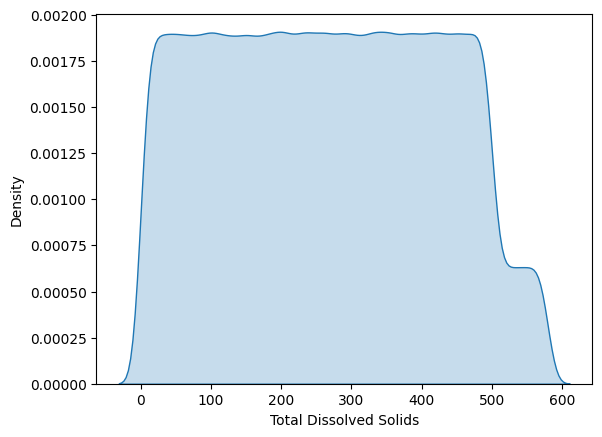

In [34]:
sns.kdeplot(water_data["Total Dissolved Solids"], shade = True)

In [35]:
# Function to classify water quality based on TDS
def tds_quality(tds):
    if tds <= 300:
        return 'Excellent', 'Ideal for drinking'
    elif 300 < tds <= 600:
        return 'Good', 'Acceptable taste'
    elif 600 < tds <= 900:
        return 'Fair', 'Slightly salty or mineral taste'
    elif 900 < tds <= 1200:
        return 'Poor', 'Unpleasant taste'
    else:
        return 'Unacceptable', 'Not recommended for drinking'


In [36]:
# Apply classification
water_data[['Water Quality', 'Remarks']] = water_data['Total Dissolved Solids'].apply(lambda x: pd.Series(tds_quality(x)))

In [37]:
# Display the classified data
water_data[['Total Dissolved Solids', 'Water Quality', 'Remarks']].head()

,Total Dissolved Solids,Water Quality,Remarks
1,284.641984,Excellent,Ideal for drinking
2,570.054094,Good,Acceptable taste
4,168.075545,Excellent,Ideal for drinking
7,214.553104,Excellent,Ideal for drinking
9,113.909077,Excellent,Ideal for drinking


**Turbidity**

<Axes: xlabel='Turbidity', ylabel='Density'>

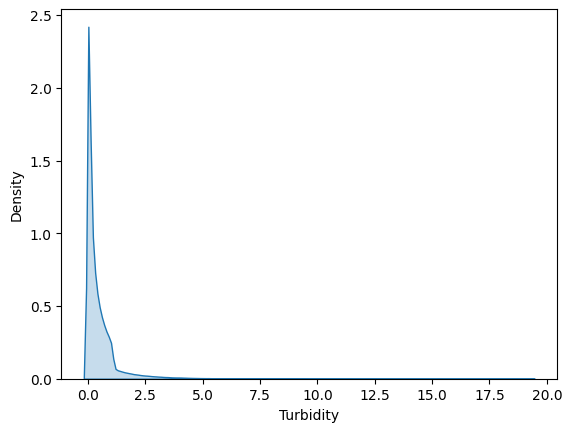

In [38]:
sns.kdeplot(water_data["Turbidity"], shade = True)

In [39]:
# Function to classify turbidity levels
def turbidity_status(ntu):
    if ntu < 1:
        return 'Excellent', 'Recommended for effective disinfection'
    elif 1 <= ntu <= 5:
        return 'Acceptable', 'Safe appearance, but may reduce disinfection'
    else:
        return 'Unacceptable', 'Poor appearance, disinfection may be ineffective'

In [40]:
# Apply classification
water_data[['Turbidity Status', 'Remarks']] = water_data['Turbidity'].apply(lambda x: pd.Series(turbidity_status(x)))

In [41]:
water_data[['Turbidity', 'Turbidity Status', 'Remarks']].head()

,Turbidity,Turbidity Status,Remarks
1,0.019007,Excellent,Recommended for effective disinfection
2,0.319956,Excellent,Recommended for effective disinfection
4,0.004867,Excellent,Recommended for effective disinfection
7,0.047803,Excellent,Recommended for effective disinfection
9,0.050613,Excellent,Recommended for effective disinfection


**Source**

<Axes: xlabel='Source', ylabel='count'>

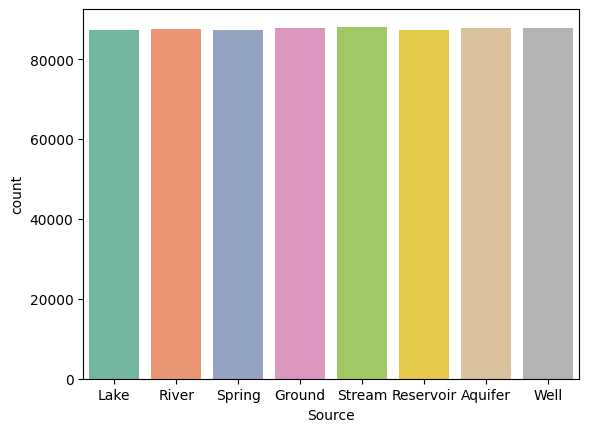

In [42]:
sns.countplot(x = 'Source', data = water_data, palette = 'Set2')

**Color**

<Axes: xlabel='Color', ylabel='count'>

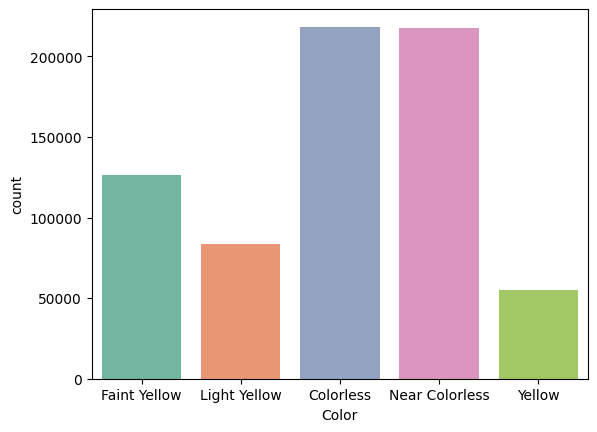

In [43]:
sns.countplot(x = 'Color', data = water_data, palette = 'Set2')

**Fluoride**

<Axes: xlabel='Fluoride', ylabel='Density'>

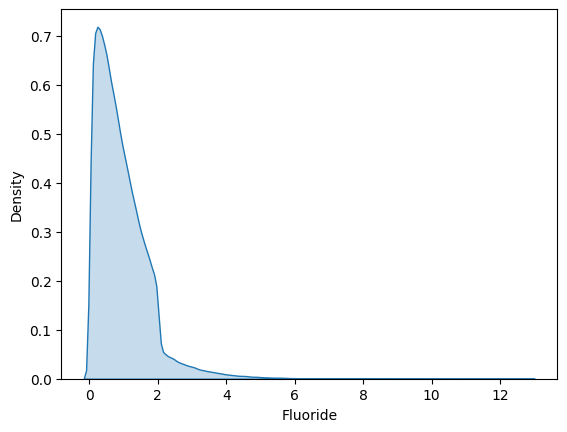

In [44]:
sns.kdeplot(water_data["Fluoride"], shade = True)

In [45]:
# Classify fluoride safety levels
water_data['Fluoride Status'] = water_data['Fluoride'].apply(
    lambda x: 'Safe' if x <= 1.0 else
              'Caution' if x <= 1.5 else
              'Unsafe'
)

In [46]:
water_data[['Index', 'Fluoride', 'Fluoride Status']].head()

,Index,Fluoride,Fluoride Status
1,1,0.622874,Safe
2,2,0.423423,Safe
4,4,0.222912,Safe
7,7,1.016196,Caution
9,9,0.842107,Safe


In [47]:
# Classify severity
water_data['Severity'] = water_data['Target'].apply(
    lambda x: 'Diahreal Case' if x == 0 else
              'Not Diarrheal Case'
)

In [48]:
water_data['Remarks'] = water_data['Severity'].apply(
    lambda s: 'Under control' if s == 0 else
                   'Outbreak / Emergency alert'
)

In [49]:
water_data[['Index', 'Target', 'Remarks']].head(111)

,Index,Target,Remarks
1,1,0,Outbreak / Emergency alert
2,2,0,Outbreak / Emergency alert
4,4,0,Outbreak / Emergency alert
7,7,0,Outbreak / Emergency alert
9,9,0,Outbreak / Emergency alert
...,...,...,...
157,157,0,Outbreak / Emergency alert
159,159,0,Outbreak / Emergency alert
160,160,0,Outbreak / Emergency alert
161,161,0,Outbreak / Emergency alert


**Time Series Forecasting**

In [50]:
# Convert float time (e.g., 9.5) to HH:MM string
def float_to_time_str(t):
    hour = int(t)
    minute = int((t - hour) * 60)
    return f"{hour:02}:{minute:02}"

In [51]:
water_data['Formatted Time'] = water_data['Time of Day'].apply(float_to_time_str)

In [52]:
# Combine into datetime
water_data['Datetime'] = pd.to_datetime(
    water_data['Month'] + ' ' +
    water_data['Day'].astype(str) + ' 2023 ' +
    water_data['Formatted Time']
)

In [53]:
# Set datetime index and clean up
water_data.set_index('Datetime', inplace=True)
water_data.drop(columns=['Month', 'Day', 'Time of Day', 'Formatted Time'], inplace=True)

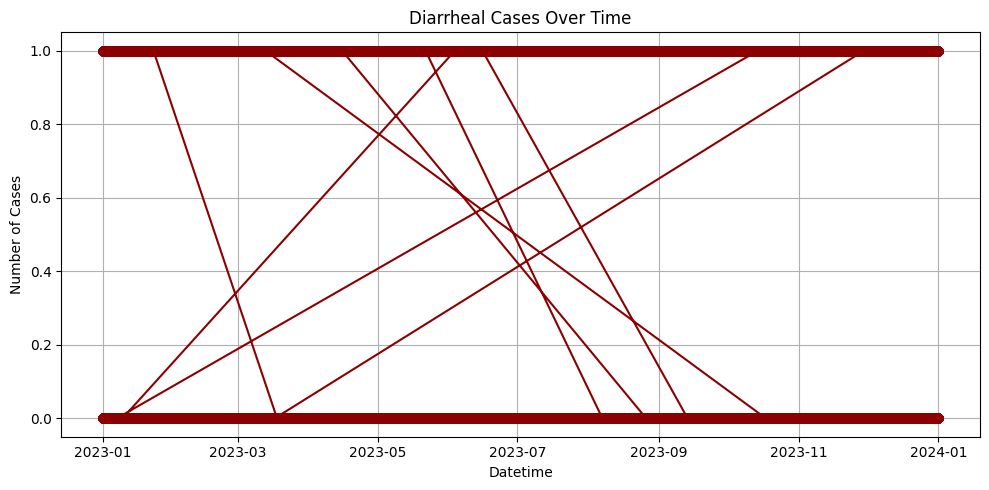

In [54]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(water_data.index, water_data['Target'], marker='o', linestyle='-', color='darkred')
plt.title('Diarrheal Cases Over Time')
plt.xlabel('Datetime')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

**Dropping the Columns**

In [55]:
water_data.drop(columns=['Iron', 'Chloride', 'Lead', 'Zinc', 'Color', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Manganese', 'Source'], inplace=True)

In [56]:
cols_to_drop = ['Month']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

In [57]:
cols_to_drop = ['Month', 'Chlorine Status', 'pH Status', 'Nitrate Status', 'Water Quality', 'Fluoride Status', 'Remarks', 'Turbidity Status', 'Severity']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

In [58]:
X = water_data.drop(columns = 'Target', axis = 1)
Y = water_data['Target']

In [59]:
print(X)
print()

                       Index        pH   Nitrate  Turbidity  Fluoride  \
Datetime                                                                
2023-11-26 16:00:00        1  6.917863  3.734167   0.019007  0.622874   
2023-01-31 08:00:00        2  5.443762  3.816994   0.319956  0.423423   
2023-06-29 07:00:00        4  8.091909  9.925788   0.004867  0.222912   
2023-04-11 04:00:00        7  7.258203  9.261676   0.047803  1.016196   
2023-04-07 12:00:00        9  7.100650  3.620641   0.050613  0.842107   
...                      ...       ...       ...        ...       ...   
2023-12-30 15:00:00  1048569  6.957090  2.256611   0.159260  1.874301   
2023-03-15 14:00:00  1048570  8.186428  5.968850   0.020610  1.194165   
2023-12-16 00:00:00  1048571  8.046225  3.678714   0.878835  1.203689   
2023-06-18 16:00:00  1048572  7.443582  7.893399   0.701053  0.115412   
2023-05-05 03:00:00  1048573  6.897232  5.757980   0.156424  0.554729   

                     Chlorine  Total Dissolved Sol

In [60]:
print(Y)

Datetime
2023-11-26 16:00:00    0
2023-01-31 08:00:00    0
2023-06-29 07:00:00    0
2023-04-11 04:00:00    0
2023-04-07 12:00:00    0
                      ..
2023-12-30 15:00:00    0
2023-03-15 14:00:00    0
2023-12-16 00:00:00    0
2023-06-18 16:00:00    0
2023-05-05 03:00:00    0
Name: Target, Length: 701056, dtype: int64


**Training and Testing Data**

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(701056, 9) (630950, 9) (70106, 9)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Model Training using Logistic Regression**

In [66]:
model = LogisticRegression()

In [67]:
# training the logistic regression model by using training data
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Accuracy of logistic regression classifier on training set: {:2f}'
            .format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on training set: 0.788270


In [71]:
print('Accuracy of logistic regression classifier on testing set: {:2f}'
            .format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on testing set: 0.789597


In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree Classifier on training set: {:2f}'
            .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree Classifier on testing set: {:2f}'
            .format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree Classifier on training set: 1.000000
Accuracy of Decision Tree Classifier on testing set: 0.999994


In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB Classifier on training set: {:2f}'
            .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB Classifier on testing set: {:2f}'
            .format(gnb.score(X_test, Y_test)))

Accuracy of GNB Classifier on training set: 0.818590
Accuracy of GNB Classifier on testing set: 0.820203


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [76]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [77]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 1.0


In [78]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy on testing data:', testing_data_accuracy)

accuracy on testing data: 0.99983453532956
